# Introduction:
Welcome to the "Emotions" dataset – a collection of English Twitter messages meticulously annotated with six fundamental emotions: anger, fear, joy, love, sadness, and surprise. This dataset serves as a valuable resource for understanding and analyzing the diverse spectrum of emotions expressed in short-form text on social media.

# About the Dataset:
Each entry in this dataset consists of a text segment representing a Twitter message and a corresponding label indicating the predominant emotion conveyed. The emotions are classified into six categories: sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5). Whether you're interested in sentiment analysis, emotion classification, or text mining, this dataset provides a rich foundation for exploring the nuanced emotional landscape within the realm of social media. In this project, our focus is emotion classification using Natural Language Processing (NLP) techniques. 

# Import Libraries:

In [89]:
import pandas as pd
import seaborn as sns # for data visualization in seaborn
import matplotlib.pyplot as plt # for plotting
# Natural Language Processing Toolkit
import nltk # Natural Language tool kit 
from nltk.corpus import stopwords # get stopwords from NLTK library & get all words in english language
from nltk.tokenize import word_tokenize # to create word tokens
from nltk import pos_tag # For Parts of Speech tagging
from nltk.stem import WordNetLemmatizer # to reduce words to orginal form
import nltk
import string
from wordcloud import WordCloud
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from sklearn.metrics import classification_report

[nltk_data] Downloading package punkt to C:\Users\LATONA
[nltk_data]     FOLASHADE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\LATONA
[nltk_data]     FOLASHADE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\LATONA FOLASHADE\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Load Dataset:

In [90]:
emotions_df = pd.read_csv('/Users/LATONA FOLASHADE/OneDrive/Desktop/text.csv')
emotions_df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


# Data Exploration

In [3]:
emotions_df.shape  

(416809, 3)

Let's convert the labels to their corresponding emotions to explore the data further.

In [4]:
# Define a dictionary to map numerical labels to corresponding emotions
label_map = {
    0: 'Sadness',
    1: 'Joy',
    2: 'Love',
    3: 'Anger',
    4: 'Fear',
    5: 'Surprise'
}

# Replace numerical labels with corresponding emotions in the 'Label' column
emotions_df['label'] = emotions_df['label'].map(label_map)

In [5]:
emotions_df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,Fear
1,1,ive enjoyed being able to slouch about relax a...,Sadness
2,2,i gave up my internship with the dmrg and am f...,Fear
3,3,i dont know i feel so lost,Sadness
4,4,i am a kindergarten teacher and i am thoroughl...,Fear


Let's inspect the distribution of emotions in the data:

In [6]:
emotions_df['label'].value_counts()

label
Joy         141067
Sadness     121187
Anger        57317
Fear         47712
Love         34554
Surprise     14972
Name: count, dtype: int64

Visualizing the distribution using Seaborn:

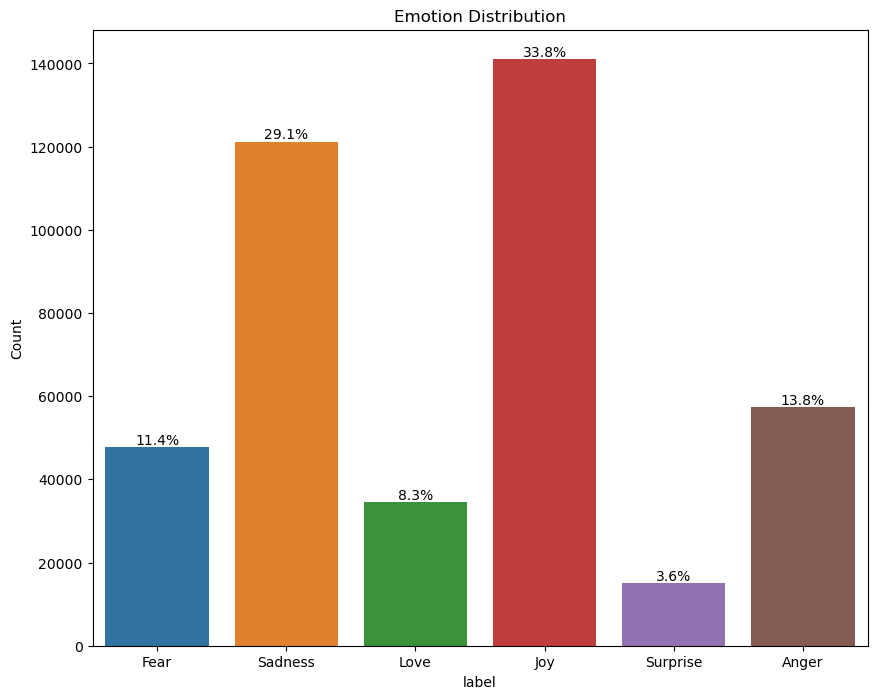

In [7]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="label", data=emotions_df) 
ax.set(ylabel='Count', title='Emotion Distribution')


# add annotations
for c in ax.containers:
    
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{h/emotions_df.label.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='edge')

plt.show()

We can see that both 'Sadness' and 'Joy' have the highest distribution with 29.1% and 33.8% respectively while 'Love' and 'Surprise' have the lowest with 8.3% and 3.6%

Let's check the data types:

In [8]:
emotions_df.dtypes

Unnamed: 0     int64
text          object
label         object
dtype: object

Dropping unwanted columns:

In [91]:
emotions_df = emotions_df.drop(['Unnamed: 0'], axis=1)
emotions_df.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


## Text Visualisation:

Now let's explore the data a little bit more further. We are going to create a wordcloud for each label in order to identify the most common words used to describe each emotion. To do this, we are going to define 4 functions. These functions will load the dataset, preprocess the text, extract adjectives, and then generate word clouds for each emotion category based on the extracted adjectives.

In [10]:
nltk.download('stopwords')
# Defining NLTK stop words and my user-defined stop words
stop_words = list(stopwords.words('english'))
alphabets = list(string.ascii_lowercase)
stop_words = stop_words + alphabets

[nltk_data] Downloading package stopwords to C:\Users\LATONA
[nltk_data]     FOLASHADE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text.lower())
    # Remove punctuation
    tokens = [word for word in tokens if word.isalnum()]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

In [12]:
def extract_adjectives(tokens):
    adjectives = [word for word, pos in pos_tag(tokens) if pos.startswith('JJ')]
    return adjectives

In [13]:
def generate_wordcloud(adjectives):
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(' '.join(adjectives))
    return wordcloud

In [14]:
def create_wordclouds(dataset):
    emotions = emotions_df['label'].unique()
    for label in emotions:
        # Filter dataset by emotion
        emotion_data = emotions_df[emotions_df['label'] == label]
        # Preprocess text and extract adjectives
        emotion_data['tokens'] = emotion_data['text'].apply(preprocess_text)
        emotion_data['adjectives'] = emotion_data['tokens'].apply(extract_adjectives)
        # Generate word cloud
        wordcloud = generate_wordcloud(emotion_data['adjectives'].sum())
        # Display word cloud
        plt.figure(figsize = (8, 8), facecolor = None)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.tight_layout(pad = 0)
        plt.title(label.capitalize() + " Word Cloud")
        plt.show()

C:\Users\LATONA FOLASHADE\AppData\Local\Temp\ipykernel_2400\2209666004.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emotion_data['tokens'] = emotion_data['text'].apply(preprocess_text)
C:\Users\LATONA FOLASHADE\AppData\Local\Temp\ipykernel_2400\2209666004.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emotion_data['adjectives'] = emotion_data['tokens'].apply(extract_adjectives)


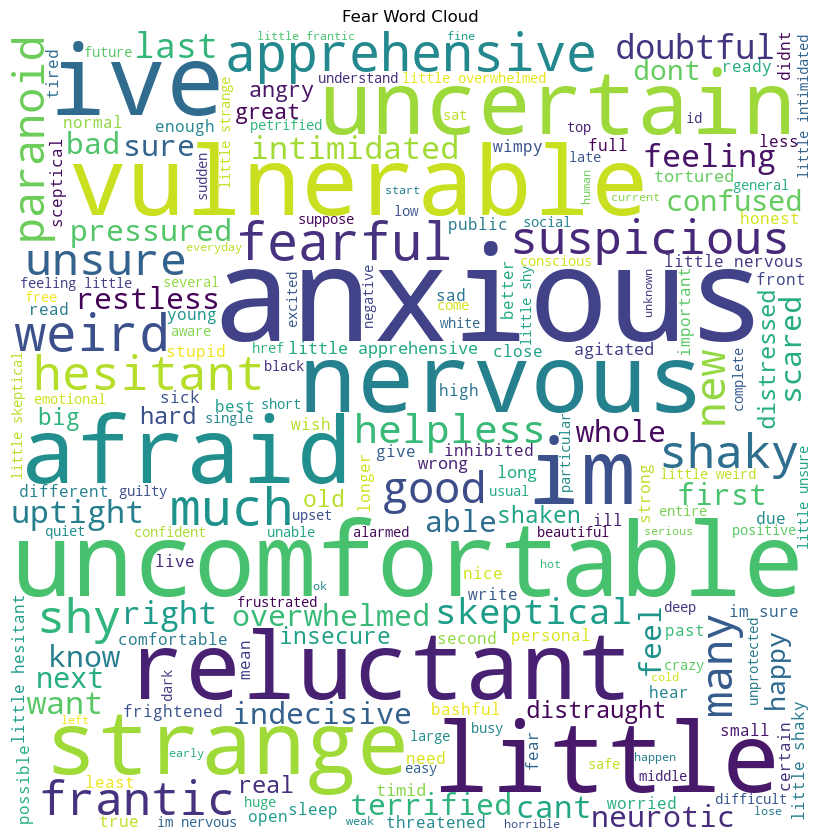

C:\Users\LATONA FOLASHADE\AppData\Local\Temp\ipykernel_2400\2209666004.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emotion_data['tokens'] = emotion_data['text'].apply(preprocess_text)
C:\Users\LATONA FOLASHADE\AppData\Local\Temp\ipykernel_2400\2209666004.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emotion_data['adjectives'] = emotion_data['tokens'].apply(extract_adjectives)


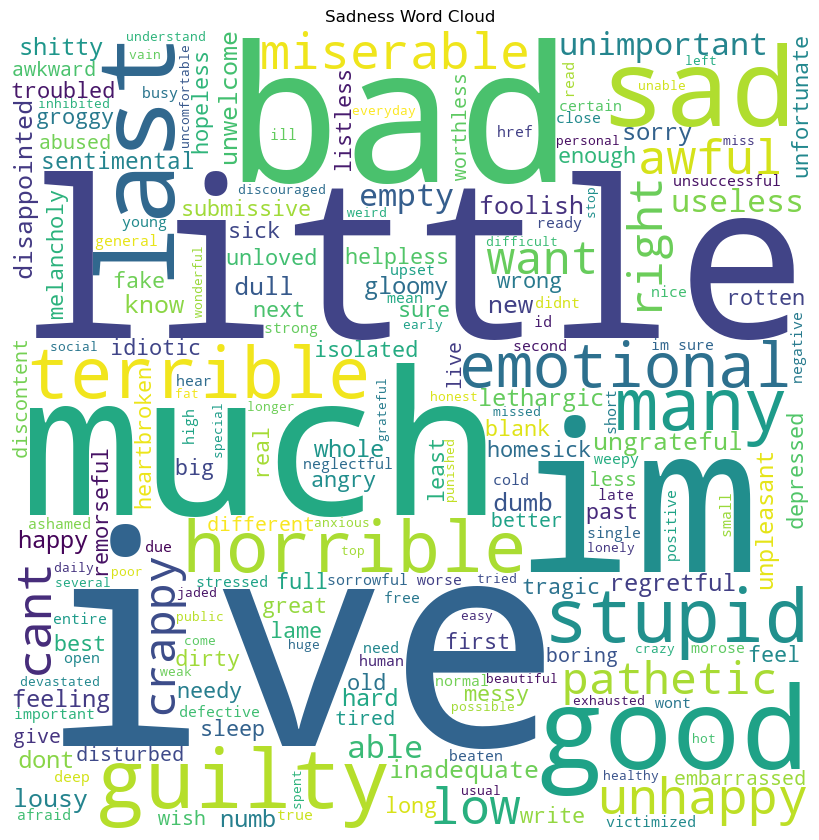

C:\Users\LATONA FOLASHADE\AppData\Local\Temp\ipykernel_2400\2209666004.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emotion_data['tokens'] = emotion_data['text'].apply(preprocess_text)
C:\Users\LATONA FOLASHADE\AppData\Local\Temp\ipykernel_2400\2209666004.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emotion_data['adjectives'] = emotion_data['tokens'].apply(extract_adjectives)


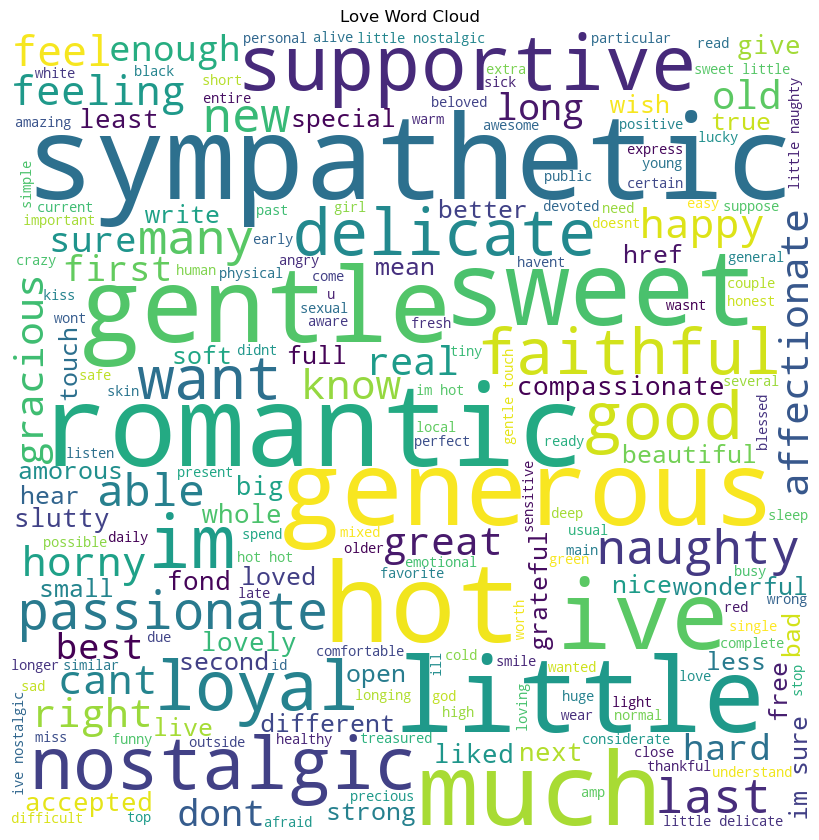

C:\Users\LATONA FOLASHADE\AppData\Local\Temp\ipykernel_2400\2209666004.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emotion_data['tokens'] = emotion_data['text'].apply(preprocess_text)
C:\Users\LATONA FOLASHADE\AppData\Local\Temp\ipykernel_2400\2209666004.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emotion_data['adjectives'] = emotion_data['tokens'].apply(extract_adjectives)


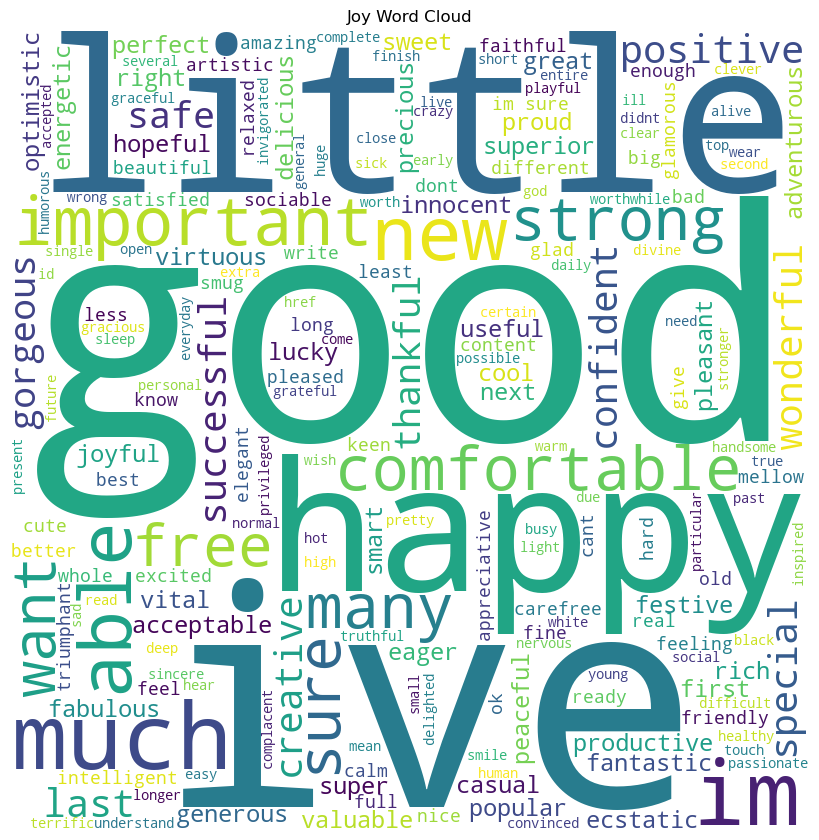

C:\Users\LATONA FOLASHADE\AppData\Local\Temp\ipykernel_2400\2209666004.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emotion_data['tokens'] = emotion_data['text'].apply(preprocess_text)
C:\Users\LATONA FOLASHADE\AppData\Local\Temp\ipykernel_2400\2209666004.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emotion_data['adjectives'] = emotion_data['tokens'].apply(extract_adjectives)


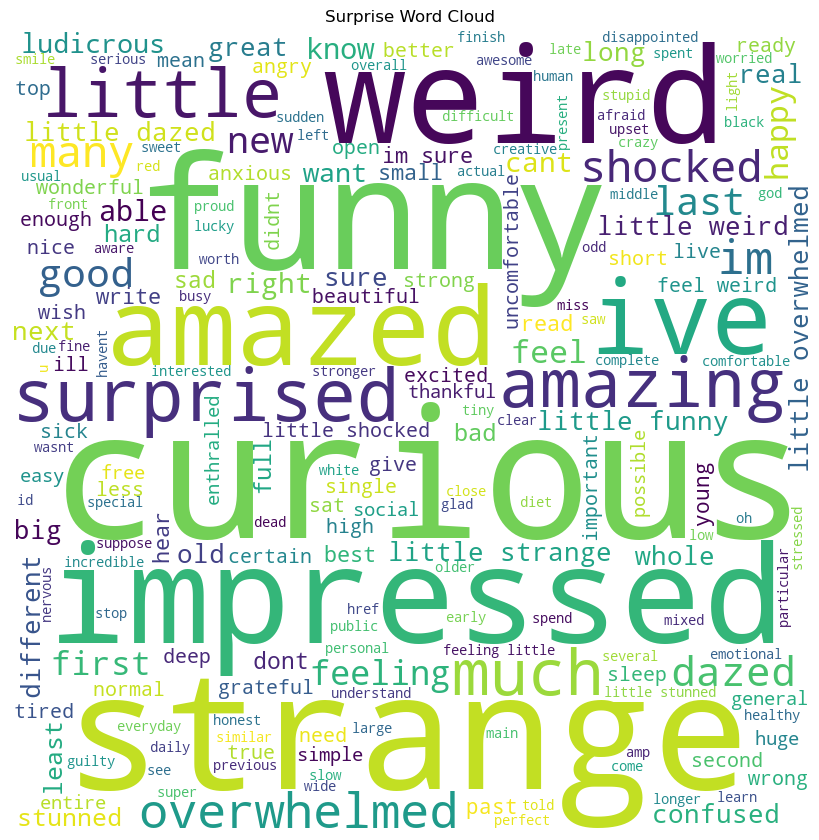

C:\Users\LATONA FOLASHADE\AppData\Local\Temp\ipykernel_2400\2209666004.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emotion_data['tokens'] = emotion_data['text'].apply(preprocess_text)
C:\Users\LATONA FOLASHADE\AppData\Local\Temp\ipykernel_2400\2209666004.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emotion_data['adjectives'] = emotion_data['tokens'].apply(extract_adjectives)


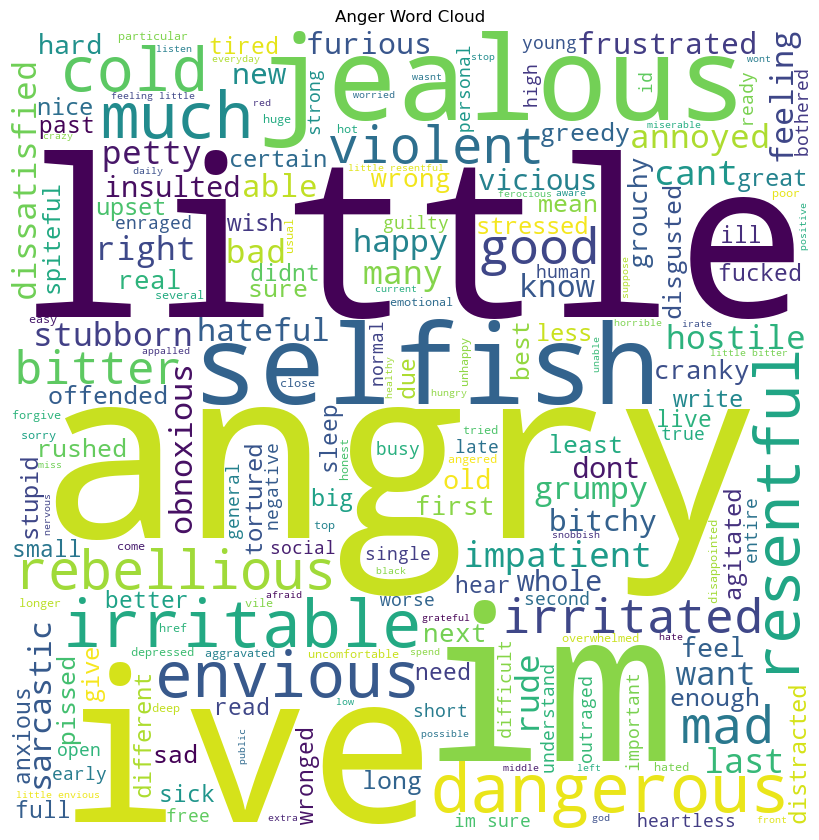

In [15]:
create_wordclouds(emotions_df)

From the generated wordclouds above, we can see that for each emotion, the most common words are words that are usually used to describe them. e.g for the emotion fear, we can see that some of the most common words are 'anxious','nervous', 'afraid' & uncomfortable. For Sadness, some of the most common words are 'horrible','terrible','bad' & 'sad'. For love we have words like 'romantic', 'gentle', 'sweet' & 'generous'. For Joy, we have words like 'good', 'happy', 'comfortable'. For Surprise, there are words like 'amazed', 'surprised', 'curious'& 'impressed'. And for the final emotion anger, we have words like 'jealous', 'selfish', 'angry' and 'envious'. 

Let's convert the emotions back to their original labels:

In [16]:
label_map = {
    'Sadness': 0,
    'Joy': 1,
    'Love':2,
    'Anger': 3,
    'Fear': 4,
    'Surprise': 5
}

# Replace numerical labels with corresponding emotions in the 'Label' column
emotions_df['label'] = emotions_df['label'].map(label_map)

emotions_df.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


# Preprocessing:

In [18]:
string.punctuation

# Define the punctuation characters to remove
punctuation = string.punctuation

In [19]:
# Function to remove punctuation from text
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punctuation))

# Apply remove_punctuation function to 'Text' column
emotions_df['text'] = emotions_df['text'].apply(remove_punctuation)

In [20]:
# Function to remove stop words from text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply remove_stopwords function to 'Text' column
emotions_df['text'] = emotions_df['text'].apply(remove_stopwords)

In [63]:
X = emotions_df['text']
y = emotions_df['label']

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

# Bag of Words

Representing text data as a bag of words is one of the most simple and effective methods of representing text for machine learning use cases. When this is done, most of the structure of the input text such as chapters, paragraphs and sentences are discarded and we only count how often each word appears in each text in the corpus. There are 3 steps involved when using the bag-of-words representation. These include:

1. Tokenization: This involves splitting each document into words that appear in it. These are called tokens.

2. Vocabulary building: This involves collecting a vocabulary of all words that appear in any of the documents and numbering them. (eg in alphabetical order)

3. Encoding: This involves counting how often each word in a vocabulary appears in a document.

The bag-of-words representation is implemented in a transformer called CountVectorizer which can be imported from the Scikit-learn library. Let's apply it to our dataset to see how it works.  

# Applying Bag-of-Words to our dataset:

In [80]:
from sklearn.feature_extraction.text import CountVectorizer

In [61]:
vect = CountVectorizer().fit(X_train)
X_train = vect.transform(X_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<291766x63586 sparse matrix of type '<class 'numpy.int64'>'
	with 2640989 stored elements in Compressed Sparse Row format>


The shape of X_train, which has been transformed to the bag-of-words representation of the training data is 291,766x63,586 which indicates that the vocabulary contains 63,586 entries. We can explore the vocabulary further by using the get_feature_names_out method of the vectorizer. This returns a list in which each entry corresponds to one feature. 

In [62]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))

Number of features: 63586
First 20 features:
['aa' 'aaa' 'aaaaaaaaaaaaaaaaggghhhh'
 'aaaaaaaaaaaaaaarrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrggggggggggggggggggggggggggggghhhhhhhhhhhhhh'
 'aaaaaaaall' 'aaaaaaand' 'aaaaaand' 'aaaaah' 'aaaaahhhhhh' 'aaaaall'
 'aaaaand' 'aaaahhhhhh' 'aaaand' 'aaah' 'aaahs' 'aaargh' 'aaawesome' 'aac'
 'aactually' 'aad']
Features 20010 to 20030:
['fgm' 'fgs' 'fh' 'fhe' 'fhl' 'fi' 'fianc' 'fiance' 'fiancee' 'fiances'
 'fianct' 'fiancte' 'fiancts' 'fiasco' 'fiat' 'fiatt' 'fib' 'fibbing'
 'fiber' 'fibers']
Every 2000th feature:
['aa' 'analogies' 'backpacked' 'bloods' 'candelabras' 'cleopas' 'counsel'
 'demolished' 'downed' 'environmentally' 'ffk' 'gammaflab' 'gwar'
 'hotdogs' 'instinctive' 'kates' 'licking' 'marital' 'moksha' 'nikko'
 'overstated' 'pith' 'pubs' 'relaying' 'saddle' 'sherri' 'sonoma'
 'subsidy' 'thankfulness' 'tucks' 'vampirestrawberrycutie' 'wildfire']


As you can see in the first 20 entries in the vocabulary, most of the features don't really have any immediate semantic meaning. We can also classify some of them as expressions. For example 'aaargh' could be translated as an expression of frustration. We can also see that some words have been spelt incorrectly such as 'aactually' and 'aaawesome'. Looking further, we can see that features like 'fianc', 'fiance' 'fiancee' and 'fiances'. These words have very close semantic meanings with 'fianc' probably being a typographical error, 'fiance' being the male version of someone who is engaged, 'fiancee' being the female counterpart and 'fiances' being the plural form. Therefore, counting them as different words, corresponding to different features might not be ideal. Distinguishing the meaningful from the non-meaningful features can be very tricky but there is a solution. By default, the CountVectorizer finds all sequences of characters that consist of at least two letters or numbers. This works quite well in practice but as we can see above, it sometimes extracts uninformative features. One way to reduce this is by using only tokens that appear in at least two documents or in our case at least five documents due to the size of our data. A token that appears in only one document is unlikely to appear in the test set and is therefore unhelpful. To set the minimum number of documents a token needs to appear in, we use the min_df parameter. This is shown below:

Note: Reload the X_train so we don't receive an error

In [65]:
vect = CountVectorizer(min_df=5).fit(X_train)
X_train = vect.transform(X_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<291766x18727 sparse matrix of type '<class 'numpy.int64'>'
	with 2571866 stored elements in Compressed Sparse Row format>


By requiring at least five appearances of each token, we reduce the number of features to 18,727 as seen in the output above. Let's inspect some of the tokens again:

In [66]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}".format(len(feature_names)))
print("First 50 features:\n{}".format(feature_names[:20]))
print("Features 15010 to 15030:\n{}".format(feature_names[15010:15030]))
print("Every 700th feature:\n{}".format(feature_names[::2000]))

Number of features: 18727
First 50 features:
['aa' 'aaa' 'aaron' 'ab' 'aback' 'abandon' 'abandoned' 'abandoning'
 'abandonment' 'abbey' 'abby' 'abc' 'abdomen' 'abdominal' 'abducted'
 'abhor' 'abhorrent' 'abide' 'abiding' 'abigail']
Features 15010 to 15030:
['sits' 'sitter' 'sittin' 'sitting' 'situated' 'situation' 'situations'
 'siwon' 'six' 'sixteen' 'sixth' 'sixty' 'size' 'sized' 'sizes' 'sizing'
 'sj' 'skate' 'skater' 'skates']
Every 700th feature:
['aa' 'briefs' 'cyberspace' 'fails' 'hurling' 'marginalized' 'persevere'
 'robber' 'stumbled' 'vomited']


We have clearly reduced the number of non-meaningful features. We can now train our model based on these features. 

# Model Training:

We are going to train a Logistic Regression model using GridSearch and cross-validation. We know that LogisticRegression has a regualarization parameter,C, which we will tune using GridSearch in order to find the best value that provides the best performance. Furthermore, we will set the scoring metric as "f1_macro". This is because f-score is the most commonly used metric for imbalanced datasets in multiclass settings. The multiclass f-score computes one binary f-score per class, with that said class being the positive class and the others making up the negative classes. These per-class f-scores are then averaged using one of the three strategies: "macro", "weighted" or "micro". We chose "macro" because this gives equal weight to all classes no matter what their size is and that is what we care about .  

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5,  scoring = 'f1_macro')
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.85
Best parameters:  {'C': 0.1}


We achieved a cross-validation score of 85% using C=0.1. We can then further assess the generalization performance of this parameter setting on the test set:

In [68]:
X_test = vect.transform(X_test)
print("test score: {:.2f}".format(grid.score(X_test, y_test)))

test score: 0.85


We achieved the same score on the test set. Let's assess the perfomance of the model further by plotting a confusion matrix and a classification report:

In [69]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
pred = grid.predict(X_test)
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))
print("\nTest set classification report:")
print(classification_report(y_test, y_pred))

Confusion matrix:
[[34092   485   140   796   612    79]
 [  557 39150  1888   225   245   309]
 [  111  2110  8058    76    37    19]
 [  911   363    71 15380   519    33]
 [  654   296    51   535 12085   620]
 [   80   337    27    16   849  3227]]

Test set classification report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     36204
           1       0.92      0.93      0.92     42374
           2       0.78      0.77      0.77     10411
           3       0.91      0.90      0.91     17277
           4       0.85      0.85      0.85     14241
           5       0.74      0.71      0.72      4536

    accuracy                           0.90    125043
   macro avg       0.86      0.85      0.85    125043
weighted avg       0.90      0.90      0.90    125043



# Bag-of-words with More than One Word (n-Grams)

One of the main drawbacks of using the bag-of-words representation is that word order is completely discarded. For example, the strings "its bad, not good at all" and "its good, not bad at all" have the same representation even though they do not mean the same. Luckily, there is a way of remedying this. Instead of considering just the counts of single tokens, we consider counts of pairs or triplets of tokens that appear next to each other. Pairs of tokens are called "bigrams" while triplets of tokens are called "trigrams" and mpore sequences of tokens are called "n-grams". In order to do this, we can change the range of tokens considered as features by changing the ngram_range parameter of the CountVectorizer. This parameter is a tuple that consists of the minimum and maximum lengths of the sequences of tokens that are considered. Let's take a look at the example below to understand it better. 

### Example:

In [85]:
example = emotions_df['text'][15]
example=[example]
print(example)

['i may be more biased than the next because i have a dependent life to take care of and to keep safe but i feel we all need to take care of ourselves as well']


We will start with the default which is single tokens. Single tokensd are called "unigrams"

In [86]:
cv = CountVectorizer(ngram_range=(1,1)).fit(example)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names_out()))

Vocabulary size: 26
Vocabulary:
['all' 'and' 'as' 'be' 'because' 'biased' 'but' 'care' 'dependent' 'feel'
 'have' 'keep' 'life' 'may' 'more' 'need' 'next' 'of' 'ourselves' 'safe'
 'take' 'than' 'the' 'to' 'we' 'well']


Now let's take a look at only bigrams which are sequences of two tokens following each other. To do this, we set the ngram_range to (2,2)

In [87]:
cv = CountVectorizer(ngram_range=(2,2)).fit(example)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names_out()))

Vocabulary size: 27
Vocabulary:
['all need' 'and to' 'as well' 'be more' 'because have' 'biased than'
 'but feel' 'care of' 'dependent life' 'feel we' 'have dependent'
 'keep safe' 'life to' 'may be' 'more biased' 'need to' 'next because'
 'of and' 'of ourselves' 'ourselves as' 'safe but' 'take care' 'than the'
 'the next' 'to keep' 'to take' 'we all']


We can see that the number of features increased by 1 to 27. This is because using longer sequences of tokens usually result in more features.  In most cases, the minimum number of tokens should be one. This is because single words often capture a lot of meaning. We can also add up to 5-grams but this will lead to an explosion of ther number of features and can also lead to overfitting. 

Now let's see how using unigrams, bigrams and trigrams look like: 

In [88]:
cv = CountVectorizer(ngram_range=(1,3)).fit(example)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names_out()))

Vocabulary size: 80
Vocabulary:
['all' 'all need' 'all need to' 'and' 'and to' 'and to keep' 'as'
 'as well' 'be' 'be more' 'be more biased' 'because' 'because have'
 'because have dependent' 'biased' 'biased than' 'biased than the' 'but'
 'but feel' 'but feel we' 'care' 'care of' 'care of and'
 'care of ourselves' 'dependent' 'dependent life' 'dependent life to'
 'feel' 'feel we' 'feel we all' 'have' 'have dependent'
 'have dependent life' 'keep' 'keep safe' 'keep safe but' 'life' 'life to'
 'life to take' 'may' 'may be' 'may be more' 'more' 'more biased'
 'more biased than' 'need' 'need to' 'need to take' 'next' 'next because'
 'next because have' 'of' 'of and' 'of and to' 'of ourselves'
 'of ourselves as' 'ourselves' 'ourselves as' 'ourselves as well' 'safe'
 'safe but' 'safe but feel' 'take' 'take care' 'take care of' 'than'
 'than the' 'than the next' 'the' 'the next' 'the next because' 'to'
 'to keep' 'to keep safe' 'to take' 'to take care' 'we' 'we all'
 'we all need' 'well']


We can see that the number of features has significantly increased to 80. 

Now let's find the best setting of n-gram using grid search to see if we can improve our model performance:

In [36]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(
    CountVectorizer(min_df=5),  # CountVectorizer with custom tokenizer
    LogisticRegression(max_iter=100000))  # Logistic regression model

param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100], 
              "countvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring = 'f1_macro')
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

Best cross-validation score: 0.86
Best parameters:
{'countvectorizer__ngram_range': (1, 2), 'logisticregression__C': 0.1}


We achieved a cross-validation score of 86% which is  just slightly better than the previous performance using C=0.1 and the n-gram range set to (1, 2). Let's plot the classification report 

Evaluate the best model on the test set:

In [37]:
# Evaluate the best model on the test set
y_pred = grid.predict(X_test)
print("\nTest set classification report:")
print(classification_report(y_test, y_pred))


Test set classification report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     36204
           1       0.92      0.93      0.92     42374
           2       0.78      0.77      0.77     10411
           3       0.91      0.90      0.91     17277
           4       0.85      0.85      0.85     14241
           5       0.74      0.71      0.72      4536

    accuracy                           0.90    125043
   macro avg       0.86      0.85      0.85    125043
weighted avg       0.90      0.90      0.90    125043

